# WER-Analyse – Common Voice 10h  
- 2025-06-09  
- Modelle: Whisper tiny, base, small, medium, large  
- Datensatz: common_voice_subset_10h  

# Merge der WER für verschiedene Modelle

In [4]:
import pandas as pd

# Einzelne WER-Dateien laden
df_tiny = pd.read_csv("../results/subset_10h/wer_10h_tiny.csv").rename(columns={
    "hypothesis": "hyp_tiny", "wer": "wer_tiny"
})
df_base = pd.read_csv("../results/subset_10h/wer_10h_base.csv").rename(columns={
    "hypothesis": "hyp_base", "wer": "wer_base"
})
df_small = pd.read_csv("../results/subset_10h/wer_10h_small.csv").rename(columns={
    "hypothesis": "hyp_small", "wer": "wer_small"
})
df_medium = pd.read_csv("../results/subset_10h/wer_10h_medium.csv").rename(columns={
    "hypothesis": "hyp_medium", "wer": "wer_medium"
})
df_large = pd.read_csv("../results/subset_10h/wer_10h_large.csv").rename(columns={
    "hypothesis": "hyp_large", "wer": "wer_large"
})

# Zusammenführen über 'filename'
wer_all = df_tiny[["filename", "reference", "hyp_tiny", "wer_tiny"]] \
    .merge(df_base[["filename", "hyp_base", "wer_base"]], on="filename") \
    .merge(df_small[["filename", "hyp_small", "wer_small"]], on="filename") \
    .merge(df_medium[["filename", "hyp_medium", "wer_medium"]], on="filename") \
    .merge(df_large[["filename", "hyp_large", "wer_large"]], on="filename")

# Vorschau
wer_all.head()

# Optional: speichern
#wer_all.to_csv("../results/subset_10h/wer_10h_all_models.csv", index=False)

,filename,reference,hyp_tiny,wer_tiny,hyp_base,wer_base,hyp_small,wer_small,hyp_medium,wer_medium,hyp_large,wer_large
0,common_voice_en_39583414.mp3,Near the beachouse is a large modern playground.,Near the beach house is a large modern playgro...,0.250000,Near the beach house is a large modern playgro...,0.250000,Near the beach house is a large modern playgro...,0.250000,Near the beach house is a large modern playgro...,0.250000,Near the beach house is a large modern playgro...,0.250000
1,common_voice_en_32643056.mp3,Take them or leave them.,Take them or leave them.,0.000000,Take them or leave them.,0.000000,Take them or leave them.,0.000000,Take them or leave them.,0.000000,Take them or leave them.,0.000000
2,common_voice_en_32644079.mp3,"The frequency of ""Sun Valley Magazine"" is bian...",The frequency of Sun Valley Magazine is by ann...,0.250000,The frequency of Sun Valley magazine is by ann...,0.250000,The frequency of Sun Valley magazine is biannual.,0.000000,The frequency of Sun Valley magazine is biannual.,0.000000,The frequency of Sun Valley Magazine is biannual.,0.000000
3,common_voice_en_21100277.mp3,He is officially a candidate for the United St...,He is officially a candidate for the U.S. Cong...,0.200000,He is officially a candidate for the United St...,0.000000,He is officially a candidate for the United St...,0.000000,He is officially a candidate for the United St...,0.000000,He is officially a candidate for the United St...,0.000000
4,common_voice_en_19179485.mp3,It is part of Saint Andrew's Parish.,It is part of saying Andrew's parish.,0.142857,It is part of St Andrew's parish.,0.142857,It is part of saying Andrew's parish.,0.142857,It is part of St. Andrew's Parish.,0.142857,It is part of St. Andrew's Parish.,0.142857


# Merge WER und Features

In [5]:
# Features laden
features = pd.read_csv("../results/subset_10h/features_250609.csv")

# WER-Daten laden
wer = pd.read_csv("../results/subset_10h/wer_10h_all_models.csv")

# Merge über 'filename'
df_merged = pd.merge(features, wer, on="filename")

# Ergebnis prüfen
print(f"Form: {df_merged.shape}")
df_merged.head()

# Optional speichern
#df_merged.to_csv("../results/subset_10h/features_and_wer_10h.csv", index=False)

Form: (5065, 134)


,filename,filepath,rms,log_energy,clipping_ratio,crest_factor,snr,hnr,f0,phoneme_entropy,...,hyp_tiny,wer_tiny,hyp_base,wer_base,hyp_small,wer_small,hyp_medium,wer_medium,hyp_large,wer_large
0,common_voice_en_19226640.mp3,audio_files/common_voice_subset_10h/common_voi...,0.138755,7.460141,0.000044,7.206935,32.660786,23.016951,100.887721,5.278837,...,Port maintenance has often exacerbated these p...,0.142857,Poor maintenance has often exacerbated these p...,0.000000,Poor maintenance has often exacerbated these p...,0.000000,Poor maintenance has often exacerbated these p...,0.000000,Poor maintenance has often exacerbated these p...,0.000000
1,common_voice_en_23830464.mp3,audio_files/common_voice_subset_10h/common_voi...,0.111006,7.192654,0.000065,9.008530,21.029661,18.278114,182.299178,5.082705,...,Joel is currently performing with the Joel Han...,0.111111,Joel is currently performing with the Joel Han...,0.111111,Joel is currently performing with the Joel Han...,0.111111,Joel is currently performing with the Joel Han...,0.111111,Joel is currently performing with the Joel Han...,0.111111
2,common_voice_en_25974802.mp3,audio_files/common_voice_subset_10h/common_voi...,0.160976,7.385242,0.000209,6.212097,35.451930,25.376925,102.276770,5.257475,...,"Additionally, Derek's supposed to solve my mem...",0.454545,"Additionally, they are exposed to assault by m...",0.000000,"Additionally, they are exposed to assault by m...",0.000000,"Additionally, they are exposed to assault by m...",0.000000,"Additionally, they are exposed to assault by m...",0.000000
3,common_voice_en_23685836.mp3,audio_files/common_voice_subset_10h/common_voi...,0.148019,7.647268,0.000084,6.755884,30.795628,30.294788,121.143498,4.988149,...,"Landowners converted the properties to test, c...",0.300000,Land owners converted the properties to task s...,0.500000,Landowners converted the properties to pasture...,0.100000,Landowners converted their properties to pastu...,0.000000,Landowners converted the properties to pasture...,0.100000
4,common_voice_en_19002982.mp3,audio_files/common_voice_subset_10h/common_voi...,0.121973,7.459757,0.000017,8.198543,34.396152,20.432310,193.904696,5.484080,...,"At the time of closing, Metrol had quartered a...",0.416667,"At the time of closing, Mietro had quartered i...",0.250000,"At the time of closing, Mitro, Headquartered, ...",0.166667,"At the time of closing, Mitro headquartered in...",0.083333,"At the time of closing, Mitro headquartered in...",0.083333


# WER-Verteilung 

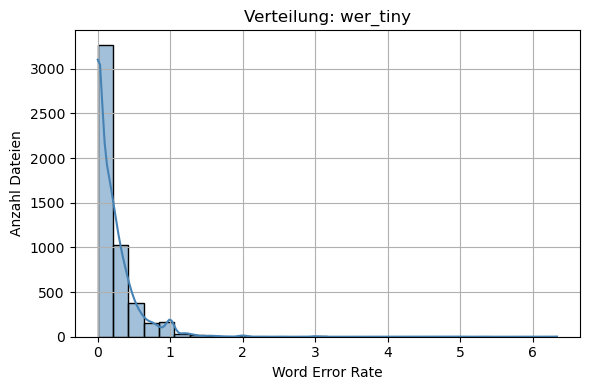

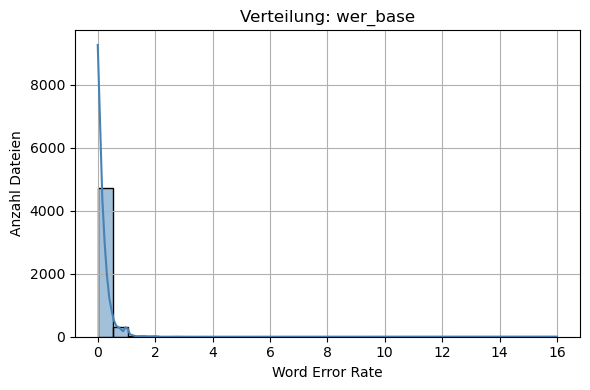

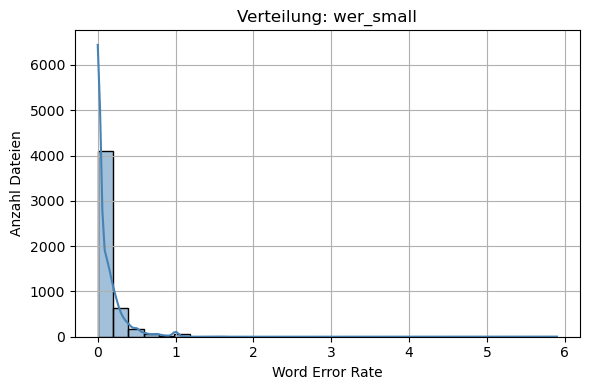

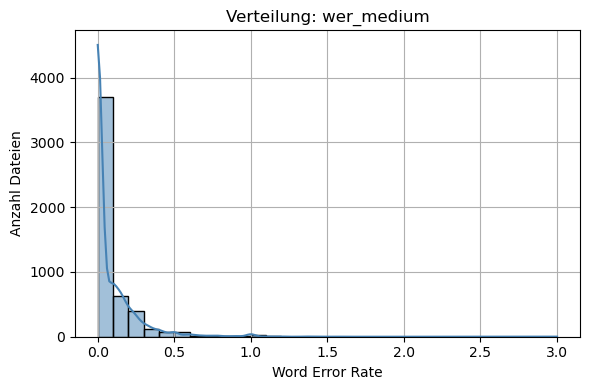

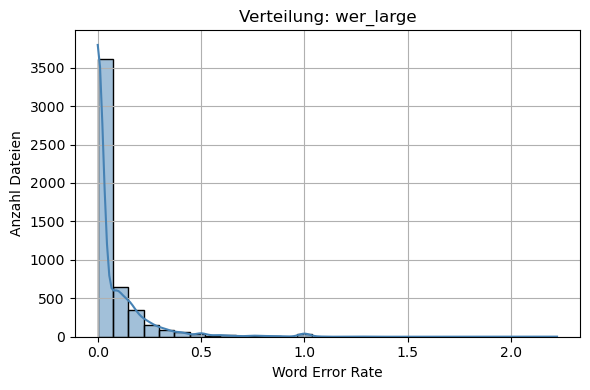

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

wer_columns = ["wer_tiny", "wer_base", "wer_small", "wer_medium", "wer_large"]

for col in wer_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_merged[col], bins=30, kde=True, color="#4682B4")  # SteelBlue
    plt.title(f"Verteilung: {col}")
    plt.xlabel("Word Error Rate")
    plt.ylabel("Anzahl Dateien")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## WER-Statistiken

In [11]:
# Statistiken für WER-Spalten
wer_stats = df_merged[wer_columns].describe().T
wer_stats["median"] = df_merged[wer_columns].median()
wer_stats = wer_stats[["count", "mean", "std", "min", "25%", "50%", "75%", "max", "median"]]
wer_stats

,count,mean,std,min,25%,50%,75%,max,median
wer_tiny,5065.0,0.212674,0.314185,0.0,0.0,0.125000,0.300000,6.333333,0.125000
wer_base,5065.0,0.158684,0.333943,0.0,0.0,0.076923,0.214286,16.000000,0.076923
wer_small,5065.0,0.102208,0.202266,0.0,0.0,0.000000,0.142857,5.900000,0.000000
wer_medium,5065.0,0.078390,0.162043,0.0,0.0,0.000000,0.111111,3.000000,0.000000
wer_large,5065.0,0.067408,0.150465,0.0,0.0,0.000000,0.083333,2.222222,0.000000


## WER-Ausreißer

In [15]:
# Anzahl Dateien mit WER > 0.5 je Modell
wer_outliers = {}

for col in wer_columns:
    count = (df_merged[col] > 0.5).sum()
    wer_outliers[col] = count

# In DataFrame umwandeln für Übersicht
pd.DataFrame.from_dict(wer_outliers, orient="index", columns=["Anzahl WER > 0.5"])

,Anzahl WER > 0.5
wer_tiny,524
wer_base,335
wer_small,175
wer_medium,111
wer_large,103


In [16]:
# Anzahl Dateien mit WER > 0.8 je Modell
wer_outliers = {}

for col in wer_columns:
    count = (df_merged[col] > 0.8).sum()
    wer_outliers[col] = count

# In DataFrame umwandeln für Übersicht
pd.DataFrame.from_dict(wer_outliers, orient="index", columns=["Anzahl WER > 0.8"])

,Anzahl WER > 0.8
wer_tiny,250
wer_base,156
wer_small,79
wer_medium,50
wer_large,52


In [17]:
# Anzahl Dateien mit WER > 1 je Modell
wer_outliers = {}

for col in wer_columns:
    count = (df_merged[col] > 1).sum()
    wer_outliers[col] = count

# In DataFrame umwandeln für Übersicht
pd.DataFrame.from_dict(wer_outliers, orient="index", columns=["Anzahl WER > 1"])

,Anzahl WER > 1
wer_tiny,76
wer_base,41
wer_small,11
wer_medium,11
wer_large,5
